In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
# from sklearn.utils import resample
from keras.optimizers.legacy import Adam

In [2]:
df = pd.read_csv('../../creditcard.csv')

In [3]:
legit=df[df.Class==0]
fraud = df[df.Class == 1]

In [4]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [5]:
class_0_data = df[df['Class'] == 0].sample(n=492, random_state=42)
class_1_data = df[df['Class'] == 1].sample(n=492, random_state=42)

In [6]:
selected_data = pd.concat([class_0_data, class_1_data])
selected_data.to_csv('downsampled_data.csv', index=False)

In [7]:
df1 = pd.read_csv('./downsampled_data.csv')

In [8]:
x=df1.drop('Class',axis=1)
y=df1['Class']

In [9]:
print(len(x))
print(len(y))

984
984


In [10]:
print(x.iloc[0])

Time      82450.000000
V1            1.314539
V2            0.590643
V3           -0.666593
V4            0.716564
V5            0.301978
V6           -1.125467
V7            0.388881
V8           -0.288390
V9           -0.132137
V10          -0.597739
V11          -0.325347
V12          -0.216435
V13           0.084204
V14          -1.054631
V15           0.967932
V16           0.601226
V17           0.631117
V18           0.295078
V19          -0.136151
V20          -0.058040
V21          -0.170307
V22          -0.429655
V23          -0.141341
V24          -0.200195
V25           0.639491
V26           0.399476
V27          -0.034321
V28           0.031692
Amount        0.760000
Name: 0, dtype: float64


In [11]:
scaler=MinMaxScaler(feature_range=(0,1))

In [12]:
x=scaler.fit_transform(x)

In [13]:
print(len(x))
print(len(y))

984
984


In [14]:
print(x[0])

[4.78359989e-01 9.68473648e-01 2.95234113e-01 8.88750176e-01
 3.14777939e-01 6.74912375e-01 4.09987799e-01 8.90322507e-01
 6.67565773e-01 7.12613976e-01 7.06118536e-01 1.42843462e-01
 8.95955197e-01 5.29567673e-01 8.01513763e-01 7.84309812e-01
 8.53010921e-01 8.08531360e-01 7.36983829e-01 3.97941102e-01
 3.35878838e-01 4.52541922e-01 4.90310219e-01 7.56558910e-01
 6.52225794e-01 7.75570920e-01 4.02201369e-01 7.00782608e-01
 5.21009314e-01 3.57500694e-04]


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [16]:
y_train.value_counts()

Class
1    372
0    366
Name: count, dtype: int64

In [17]:
y_test.value_counts()

Class
0    126
1    120
Name: count, dtype: int64

In [18]:
print(x_train.shape,y_train.shape)

(738, 30) (738,)


In [19]:
print(x_test.shape,y_test.shape)

(246, 30) (246,)


In [20]:
r,c=x_train.shape
x_train=x_train.reshape(r,c,1)

In [21]:
model = Sequential()
model.add(LSTM(100, input_shape=(x_train.shape[1], 1), activation='relu', return_sequences=True))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))

INIT_LR = 1e-5
epc=50
bs=64
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / epc)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 30, 100)           80400     
                                                                 
 lstm_2 (LSTM)               (None, 30, 100)           80400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 231851 (905.67 KB)
Trainable params: 231851 (905.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [22]:
modelfit=model.fit(x_train,y_train,epochs=epc,batch_size=bs,verbose=1)

Epoch 1/50


KeyboardInterrupt: 

In [ ]:
model.save("LSTM_Downsampling_model.keras")

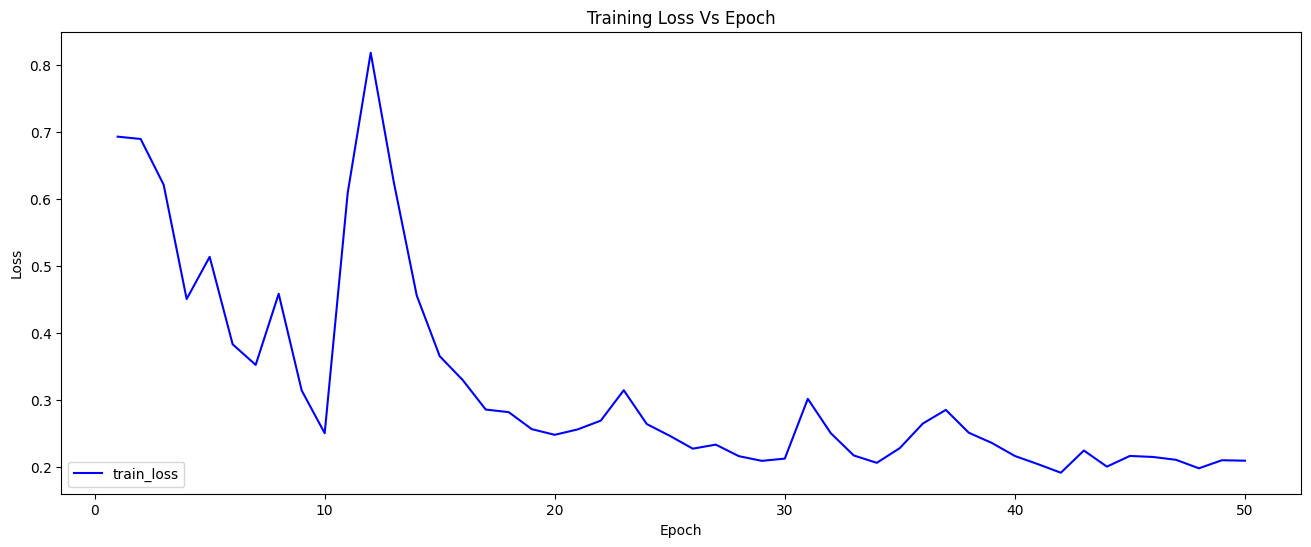

In [ ]:
myarr=np.arange(0, epc, 10)
myarr=np.append(myarr,epc)

plt.plot(np.arange(1,epc+1), modelfit.history["loss"], label="train_loss", color='blue')
plt.title("Training Loss Vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks(myarr)
plt.legend(loc="lower left")
plt.rcParams['figure.figsize']=(16,6)
plt.show()

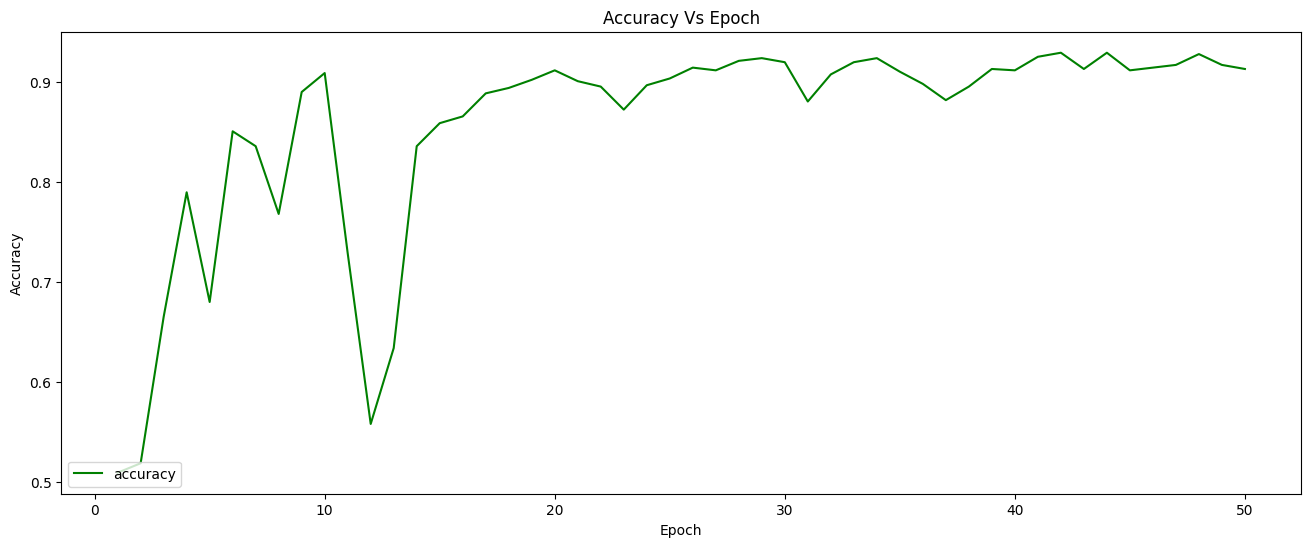

In [ ]:
plt.plot(np.arange(1, epc+1), modelfit.history["accuracy"], label="accuracy", color='green')
plt.title("Accuracy Vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xticks(myarr)
plt.legend(loc="lower left")
plt.rcParams['figure.figsize']=(16,6)
plt.show()

In [ ]:
y_train_pred=model.predict(x_train)

24/24 [==============================] - 2s 20ms/step


In [ ]:
y_train_pred=(y_train_pred>0.5).astype(int)

In [ ]:
print("Accuracy on Training Data : ",accuracy_score(y_train,y_train_pred))

Accuracy on Training Data :  0.9376693766937669


In [ ]:
print("Classification Report :\n",classification_report(y_train_pred,y_train))

Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.90      0.94       400
           1       0.89      0.98      0.94       338

    accuracy                           0.94       738
   macro avg       0.94      0.94      0.94       738
weighted avg       0.94      0.94      0.94       738



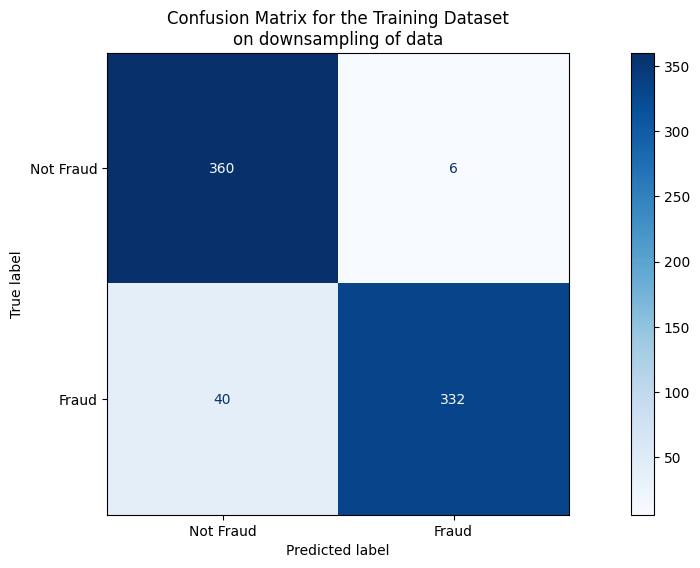

In [ ]:
cm = confusion_matrix(y_train, y_train_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for the Training Dataset\non downsampling of data')
plt.show();